<center><img alt="Colaboratory logo" width="50%" src="https://image.freepik.com/free-photo/chicago-river-night_1426-258.jpg"></center>


*by [Vivian Miranda](https://www.linkedin.com/in/vivian-miranda-9821571a6/)

---

# Análise dos Dados do Airbnb - *Chicago*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Chicago, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Uma breve apresentação do local de análise

**Chicago** é considerada a **terceira cidade mais populosa** dos Estados Unidos da América ficando atrás apenas de **Los Angeles** (segundo lugar) e **New York** (primeiro lugar), contando com 2.695.598 de habitantes (2010). É apelidada de cidade das artes, possui incríveis prédios, esculturas à céu aberto, artistas tocando blues e jazz pelas ruas e também serviu de palco para a filmagem de filmes que entraram para a história como: *Curtindo a vida adoidado (1986)*, *Os Intocáveis (1987)*, e *Esqueceram de mim (1990)*. No nicho gastronômico possui pratos clássicos de dar água na boca, dentre eles está a famosa pizza **"deep-dish"** apresentando uma massa de torta com bastante queijo e molho dentro. *Salivou, né? Haha*. Segundo a *Época Negócios (2018)*, Chicago está entre as 21 cidades mais influentes do mundo ocupando a oitava posição, é sede de duas das **maiores bolsas** *commodities* do mundo. Os produtos agrícolas como soja, trigo e carnes são negociados nas bolsas da cidade. Depois dessa apresentação, está nítida a importância da análise dos dados de hospedagem nessa cidade maravilhosa com grande potencial turístico, cultural e econômico, fazendo com que ela seja um dos destinos mais procurados. 


<center><img alt="Colaboratory logo" width="50%" src="https://cdn.pixabay.com/photo/2014/12/15/17/43/chicago-bean-569412_960_720.jpg"></center>

<center> Cloud Gate é uma escultura do artista Anish Kapoor, situada no centro da AT&T Plaza, no Millennium Park. </center>


## Obtenção dos Dados
Todos os dados utilizados nesta análise foram retirados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). O **Inside Airbnb** é um conjunto independente de ferramentas e dados não comerciais que permite mostrar como o **Airbnb** está sendo utilizado em várias cidades do mundo. 


Para esta análise exploratória inicial será baixado o seguinte arquivo:


*   listings.csv - *Summary information and metrics for listings in Chicago (good for visualisations)*





In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/il/chicago/2020-04-23/visualisations/listings.csv")


## Análise dos Dados
Segue abaixo um dicionário das variáveis afim de criar um entendimento inicial do que significa cada uma:

**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1947,Furnished Gold Coast studio #806,2153,Linda,NaN,Near North Side,41.90246,-87.63405,Entire home/apt,59,14,4,2020-03-29,0.06,7,3
1,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.76,1,322
2,4505,Open to healthcare professionals only until Ju...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,117,2,394,2020-02-16,2.91,1,146
3,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,80,2,384,2020-03-08,2.92,1,335
4,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,150,4,49,2019-10-23,0.67,11,320


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Nesse dataset temos 16 variáveis e 8520 entradas, baixamos a versão mais resumida. Na mesma página que baixamos o arquivo listings.csv, temos uma versão mais expandida, o listings.csv.gz que possui 8520 entradas e  106 variáveis.

In [0]:
# identificar o volume de dados do DataFrame
print ("Entradas:\t {}".format(df.shape[0]))
print ("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)
  


Entradas:	 8520
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. Por isso é importante ver logo no início se esses valores nulos são significantes comparados ao total de entradas.

* É possível ver que a coluna neighbourhood_group tem 100% dos seus valores faltantes.
* As varíaveis reviews_per_month e last_review ambas estão com 15% dos seus valores faltantes em suas colunas.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.155751
last_review                       0.155751
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis irei plotar uma histograma.

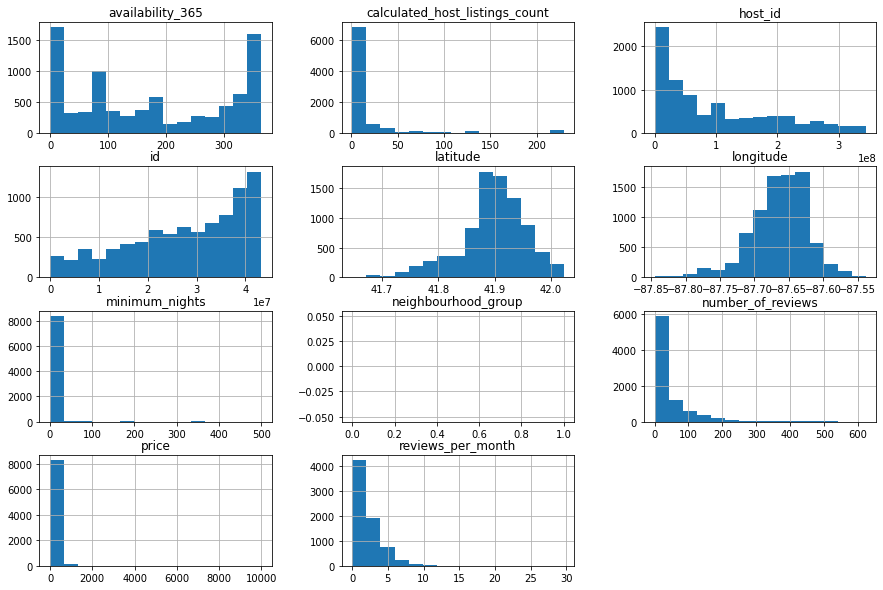

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Há outliers presentes?**

Os outliers são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise. Como já foi citado, os valores de Outliers distorcem toda a representação gráfica. Há duas maneiras para detectá-los, são elas:

* Resumo estatístico por meio do método "describe()";
* Plotar bloxpots para a variável.


Abaixo encontramos outliers em price (valor máximo de 10.000 dólares) e minumum_nights(valor máximo de 500 noites) e em calculated_host_listings_count (229).

* A variável price possui 75% dos seus valores abaixo de 165 dólares e seu valor máximo é de 10.000 dólares.

* A variável minimum_nights possui 75% de seus valores abaixo de 3 noites e seu valor máximo é de 500 noites. 



In [0]:
#ver resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8520.000000,8520.000000,8520.000000,7193.000000,8520.000000,8520.000000
mean,172.760915,6.299765,41.434038,2.067042,17.544131,175.951995
std,448.794705,18.290056,62.973122,1.903729,42.113207,134.427182
min,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,60.000000,1.000000,2.000000,0.610000,1.000000,54.000000
50%,100.000000,2.000000,17.000000,1.540000,2.000000,162.000000
75%,165.000000,3.000000,54.000000,3.040000,10.000000,323.000000
max,10000.000000,500.000000,623.000000,29.620000,229.000000,365.000000


### Boxplot para minimum_nights

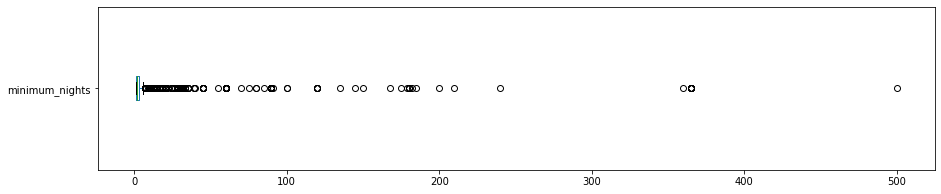

minimum_nights: valores acima de 60 dias:
51 entradas
0.5986%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 60 dias para minimum_nights
print("minimum_nights: valores acima de 60 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Boxplot para price

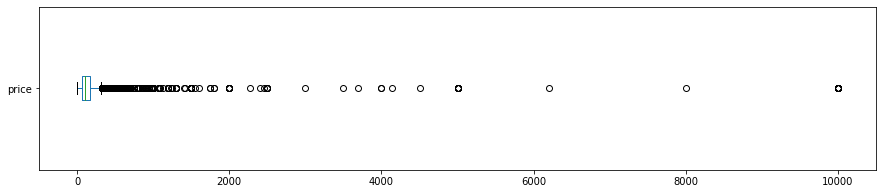

price: valores acima de $500:
306 entradas
3.5915%


In [0]:
#price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima de 500 dólares para price
print("price: valores acima de $500:")
print ("{} entradas".format(len(df[df.price > 500])))
print ("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

### Histograma sem outliers

Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

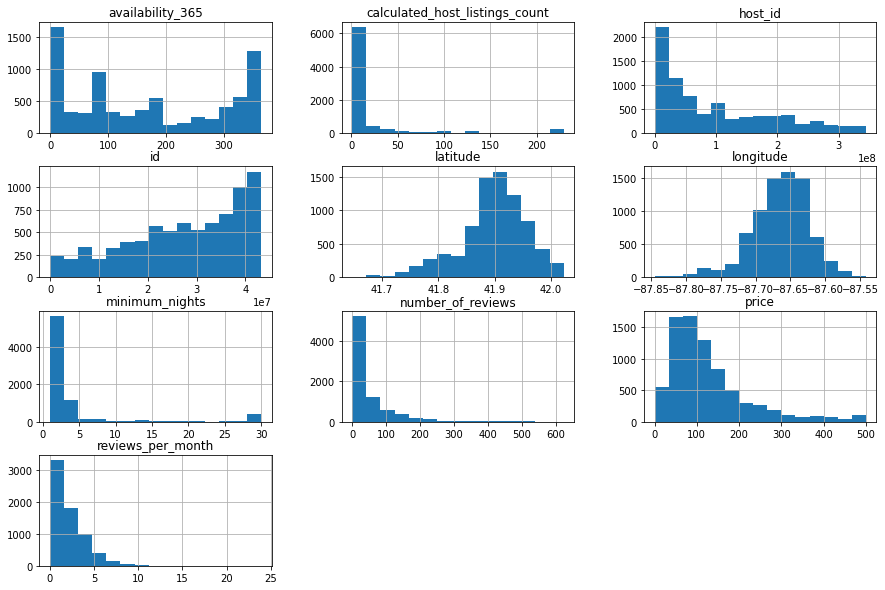

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

A média para os preços de aluguel é de 172 dólares.

In [0]:
# ver a média da coluna `price``
df[['price']].mean()


price    172.760915
dtype: float64

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.021511,-0.112377,-0.111356,0.036006,0.082093
minimum_nights,-0.021511,1.000000,-0.154889,-0.178512,0.576390,0.147756
number_of_reviews,-0.112377,-0.154889,1.000000,0.666721,-0.143741,0.073988
reviews_per_month,-0.111356,-0.178512,0.666721,1.000000,0.039621,0.037665
calculated_host_listings_count,0.036006,0.576390,-0.143741,0.039621,1.000000,0.237228
availability_365,0.082093,0.147756,0.073988,0.037665,0.237228,1.000000


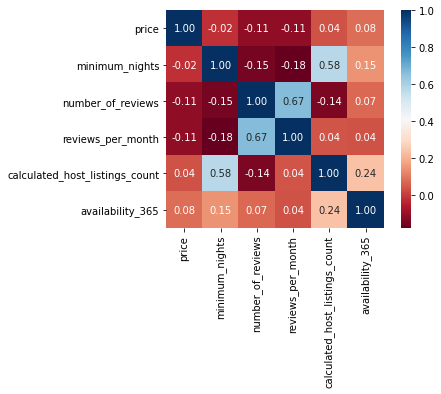

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    5208
Private room       2371
Shared room         133
Hotel room           59
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.670184
Private room       0.305109
Shared room        0.017115
Hotel room         0.007592
Name: room_type, dtype: float64

Por se tratar de uma cidade com oportunidades para se fazer negócios, o tipo imóvel mais alugado no Airbnb são casas e apartamentos inteiros. E quartos privativos seguindo em segundo lugar.
 * Apartamentos e casas inteiras - 67%
 * Quartos privativos - 30.5%
 * Quartos compartilhados - 1%
 * Quartos de hotéis - 0.07%

### **Q8. Qual a localidade mais cara do dataset?**



In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Near South Side    198.229412
Near North Side    187.085674
Loop               176.806533
Lincoln Park       172.986523
West Englewood     170.000000
North Center       169.131737
Lake View          151.955414
Armour Square      136.934783
West Town          134.152104
Logan Square       120.523452
Name: price, dtype: float64

A localidade mais cara é o Near South Side com uma média de 198 dólares por aluguel.

In [0]:
# ver quantidade de imóveis de cada bairro
df_clean.groupby(['neighbourhood']).id.count().sort_values(ascending=False)[:100]

neighbourhood
West Town          927
Near North Side    712
Lake View          628
Logan Square       533
Near West Side     447
                  ... 
West Englewood       3
South Deering        2
Burnside             2
Hegewisch            2
Edison Park          2
Name: id, Length: 76, dtype: int64

Mas como vimos acima, West Englewood consta na lista de localidades mais caras, porém só temos 3 entradas nesse bairro. Afim de conferir as informações vamos mostrar as entradas de West Englewood.

In [0]:
# Mostrar as entradas de West Englewood
df_clean[df_clean.neighbourhood == "West Englewood"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5458,35194693,It's the life of the party,246840698,Shay,West Englewood,41.76791,-87.65921,Entire home/apt,400,3,0,NaN,NaN,1,83
6115,37596429,Real place's west 2nd floor space,262478769,Don,West Englewood,41.77095,-87.67386,Private room,55,1,2,2019-10-14,0.25,4,363
6467,38608061,The real place's 2nd floor East Bedroom Suite,262478769,Don,West Englewood,41.77161,-87.67260,Private room,55,1,0,NaN,NaN,4,365


Dentre os 3 valores de preço nas 3 entradas, podemos visualizar uma de 400 dólares, ocasionando anormalidade na análise. Fazendo com que puxe o valor da média pra cima, inserindo esse bairro na lista entre os mais caros.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

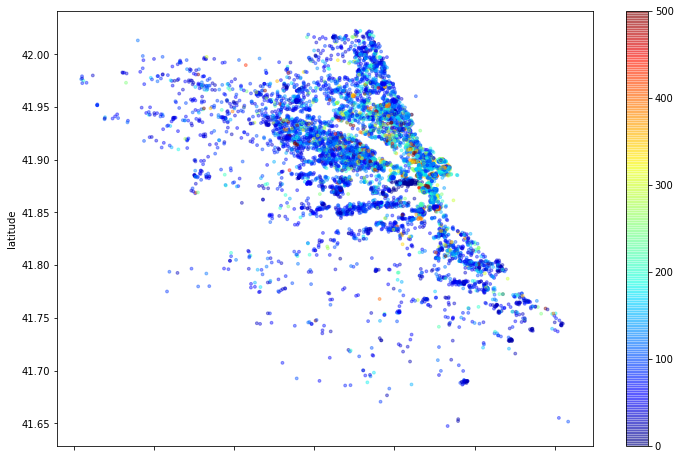

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


Note que os imóveis estão mais concentrados em localidades perto da praia.

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``
df[['minimum_nights']].mean()


minimum_nights    6.299765
dtype: float64

A média do mínimo de noites para aluguel é de 6 noites.

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, mas já percebeu que existem outliers em algumas das varíaveis contidas no dataset. Notou-se que os bairros que contém os alugueis mais caros são justamente onde se localizam os pontos turísticos. Mas há também na lista, locais onde possuem poucas entradas, como é o caso West Englewood que possui 3 entradas e um valor anormal de 400 dólares dentre os de 50 dólares fazendo com que ele seja incluído na lista de bairros mais caros. Também foi possível analisar que a média do preço do aluguel constou de 178 dólares e que o bairro mais caro foi o de Near South Side apresentando uma média de 198 dólares para o valor do aluguel. Por se tratar de um local ótimo para fazer negócios e também ser considerado um dos lugares mais influentes do mundo para se visitar, os tipos de imóveis mais alugados são casas e apartamentos inteiros e quartos privativos. Também conclui-se que 75% das pessoas dão entradas para um número abaixo de 3 noites, e a média do mínimo de noites para aluguel é de 6 noites. Plotando os imóveis pelas latitudes e longitudes disponibilizadas, é possível visualizar que os imóveis estão mais concentrados perto da praia.Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis. Mas serve de uma visão inicial para quem desejar futuramente se hospedar em Chicago. 